In [ ]:
!pip install tensorflow

In [ ]:
# Install nightly package for some functionalities that aren't in alpha
!pip install tensorflow-gpu==2.0.0-beta1

# Install TF Hub for TF2
!pip install 'tensorflow-hub == 0.5'

     |████████████████████████████████| 348.9MB 46kB/s 
     |████████████████████████████████| 501kB 42.7MB/s 
     |████████████████████████████████| 3.1MB 41.7MB/s 
     |████████████████████████████████| 81kB 4.7MB/s 
  Found existing installation: tensorflow-hub 0.7.0
    Uninstalling tensorflow-hub-0.7.0:
      Successfully uninstalled tensorflow-hub-0.7.0


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()

import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras import optimizers
from keras import regularizers

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!pip install -q keras

In [ ]:
import keras

In [ ]:
data_path = '/content/drive/My Drive/Colab Notebooks/Maize_mobilenet'
train_path = '/content/drive/My Drive/Colab Notebooks/Maize_mobilenet/train'
validation_path = '/content/drive/My Drive/Colab Notebooks/Maize_mobilenet/validation'

In [ ]:
import json

with open('/content/drive/My Drive/Colab Notebooks/Maize_mobilenet/category.json', 'r') as f:
    cat_to_name = json.load(f)
    classes = list(cat_to_name.values())
    
print (classes)
print('Number of classes:',len(classes))

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight']
Number of classes: 4


In [ ]:
IMAGE_SHAPE = (224, 224)

BATCH_SIZE = 64 #@param {type:"integer"}

In [ ]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_path, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)

do_data_augmentation = True #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen
  
train_generator = train_datagen.flow_from_directory(
    train_path, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE)

Found 772 images belonging to 4 classes.
Found 3080 images belonging to 4 classes.


In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
   
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(64, input_dim=64, kernel_regularizer = regularizers.l2(0.01)),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:

LEARNING_RATE = 0.001 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['acc'])

In [ ]:
EPOCHS=10 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


48/48 [==============================] - 1851s 39s/step - loss: 1.5858 - acc: 0.7019 - val_loss: 1.1287 - val_acc: 0.9193
Epoch 2/10
48/48 [==============================] - 47s 988ms/step - loss: 1.0366 - acc: 0.8994 - val_loss: 0.8657 - val_acc: 0.9375
Epoch 3/10
48/48 [==============================] - 47s 980ms/step - loss: 0.8265 - acc: 0.9137 - val_loss: 0.7671 - val_acc: 0.9076
Epoch 4/10
48/48 [==============================] - 47s 976ms/step - loss: 0.6977 - acc: 0.9074 - val_loss: 0.5959 - val_acc: 0.9297
Epoch 5/10
48/48 [==============================] - 47s 969ms/step - loss: 0.5798 - acc: 0.9263 - val_loss: 0.4959 - val_acc: 0.9505
Epoch 6/10
48/48 [==============================] - 46s 967ms/step - loss: 0.4889 - acc: 0.9128 - val_loss: 0.4631 - val_acc: 0.9089
Epoch 7/10
48/48 [==============================] - 46s 963ms/step - loss: 0.4339 - acc: 0.9233 - val_loss: 0.3697 - val_acc: 0.9479
Epoch 8/10
48/48 [==============================] - 46s 962ms/step - loss: 0.390

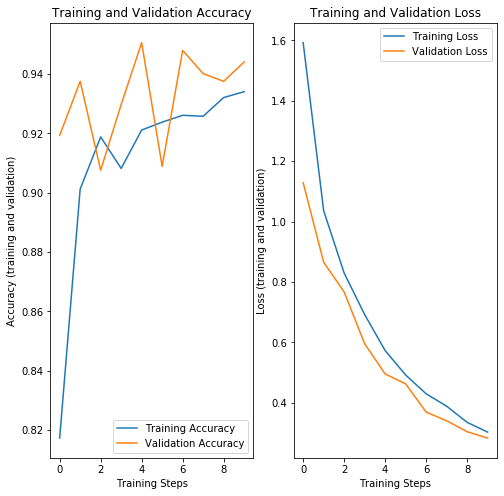

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.savefig('/content/drive/My Drive/Colab Notebooks/Maize_mobilenet/maize_graph_1.png',dpi=400)
plt.show()

**Learning rate = 0.01**

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
   
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(64, input_dim=64, kernel_regularizer = regularizers.l2(0.01)),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:

LEARNING_RATE = 0.01 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['acc'])

In [ ]:
EPOCHS=10 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/10
48/48 [==============================] - 50s 1s/step - loss: 11.9088 - acc: 0.2881 - val_loss: 11.6653 - val_acc: 0.2982
Epoch 2/10
48/48 [==============================] - 47s 985ms/step - loss: 11.4449 - acc: 0.2995 - val_loss: 11.3830 - val_acc: 0.2982
Epoch 3/10
48/48 [==============================] - 47s 970ms/step - loss: 11.2983 - acc: 0.2936 - val_loss: 11.3294 - val_acc: 0.2982
Epoch 4/10
48/48 [==============================] - 46s 960ms/step - loss: 11.1806 - acc: 0.3204 - val_loss: 11.1516 - val_acc: 0.3112
Epoch 5/10
48/48 [==============================] - 46s 956ms/step - loss: 11.4404 - acc: 0.3184 - val_loss: 11.2971 - val_acc: 0.3112
Epoch 6/10
48/48 [==============================] - 46s 960ms/step - loss: 11.2090 - acc: 0.3078 - val_loss: 11.1308 - val_acc: 0.3112
Epoch 7/10
48/48 [==============================] - 47s 980ms/step - loss: 11.2368 - acc: 0.3019 - val_loss: 11.1075 - val_acc: 0.3112
Epoch 8/10
48/48 [==============================] - 46s 95

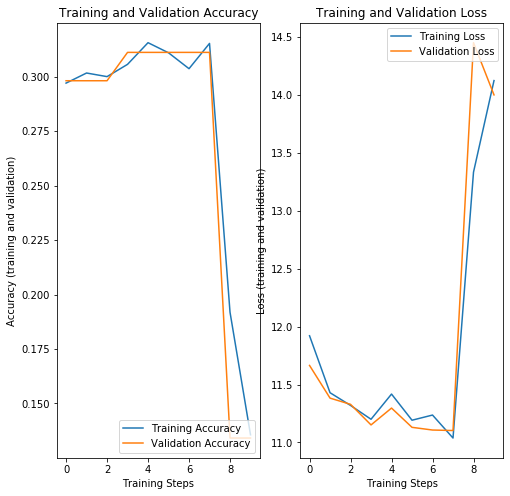

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.savefig('/content/drive/My Drive/Colab Notebooks/Maize_mobilenet/maize_graph_2.png',dpi=400)
plt.show()

**learning rate = 0.05**

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
   
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(64, input_dim=64, kernel_regularizer = regularizers.l2(0.01)),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:

LEARNING_RATE = 0.05 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['acc'])

In [ ]:
EPOCHS=10 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/10
48/48 [==============================] - 51s 1s/step - loss: 15.2546 - acc: 0.2599 - val_loss: 13.2161 - val_acc: 0.2565
Epoch 2/10
48/48 [==============================] - 47s 989ms/step - loss: 12.4494 - acc: 0.2620 - val_loss: 12.1047 - val_acc: 0.2565
Epoch 3/10
48/48 [==============================] - 47s 973ms/step - loss: 12.0349 - acc: 0.2577 - val_loss: 11.9977 - val_acc: 0.2565
Epoch 4/10
48/48 [==============================] - 46s 961ms/step - loss: 11.9888 - acc: 0.2668 - val_loss: 11.9853 - val_acc: 0.2565
Epoch 5/10
48/48 [==============================] - 46s 963ms/step - loss: 11.9168 - acc: 0.2613 - val_loss: 11.9838 - val_acc: 0.2565
Epoch 6/10
48/48 [==============================] - 47s 976ms/step - loss: 16.9645 - acc: 0.2217 - val_loss: 29.6399 - val_acc: 0.1341
Epoch 7/10
48/48 [==============================] - 46s 963ms/step - loss: 23.8686 - acc: 0.1281 - val_loss: 18.7588 - val_acc: 0.1341
Epoch 8/10
48/48 [==============================] - 46s 96

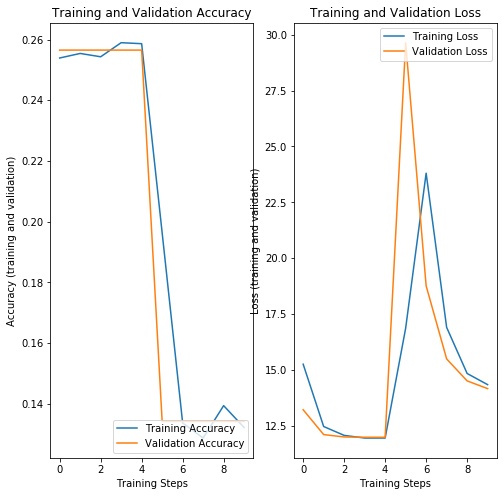

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.savefig('/content/drive/My Drive/Colab Notebooks/Maize_mobilenet/maize_graph_3.png',dpi=400)
plt.show()

**learning rate = 0.003**

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
                 output_shape=[1280],
                 trainable=False),
   
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.2),
  tf.keras.layers.Dense(64, input_dim=64, kernel_regularizer = regularizers.l2(0.01)),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:

LEARNING_RATE = 0.05 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['acc'])

In [ ]:
EPOCHS=10 #@param {type:"integer"}

history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/10
48/48 [==============================] - 50s 1s/step - loss: 15.6171 - acc: 0.2537 - val_loss: 20.9290 - val_acc: 0.1341
Epoch 2/10
48/48 [==============================] - 48s 996ms/step - loss: 19.7448 - acc: 0.1297 - val_loss: 17.7604 - val_acc: 0.1341
Epoch 3/10
48/48 [==============================] - 46s 965ms/step - loss: 16.5627 - acc: 0.1333 - val_loss: 15.6359 - val_acc: 0.1341
Epoch 4/10
48/48 [==============================] - 46s 960ms/step - loss: 15.0995 - acc: 0.1312 - val_loss: 14.7252 - val_acc: 0.1341
Epoch 5/10
48/48 [==============================] - 45s 946ms/step - loss: 14.4494 - acc: 0.1291 - val_loss: 14.3078 - val_acc: 0.1341
Epoch 6/10
48/48 [==============================] - 45s 945ms/step - loss: 14.2324 - acc: 0.1287 - val_loss: 14.1149 - val_acc: 0.1341
Epoch 7/10
48/48 [==============================] - 45s 937ms/step - loss: 14.1806 - acc: 0.1243 - val_loss: 14.0266 - val_acc: 0.1341
Epoch 8/10
48/48 [==============================] - 46s 95

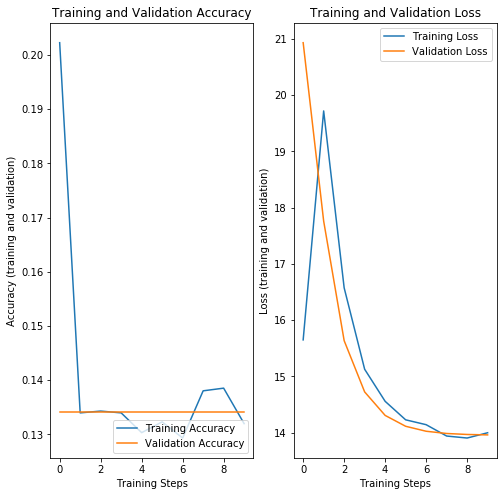

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.savefig('/content/drive/My Drive/Colab Notebooks/Maize_mobilenet/maize_graph_4.png',dpi=400)
plt.show()